# Estimation of Degrees of freedom using the Binomial-method

The main idea of the B-method [Livezey et al., 1983; Wang and Shen, 1999] is, that we correlate a random time series with every point of a given spatial dataset with space and time dimension. By chance some points will give a significant correlation with that random time series. This means that the points with significant correlation share coherence. When we make use of a lot more random time series and repeat the correlation process we can get a good hold on coherence of the field.

Probabilistically speaking the above mentioned significance test is the analogous to the flip of a loaded coin with only two outcomes. For the significance test we need a climate field X with N spatial points $x_{i,t}$ and T temporal points. The B-method can be separated in the following steps:


1. To get an idea of how coherent the given sample climate field is we correlate the every point $x_{i,t}$ with a time-series $R_t$ randomly generated according to a normal distribution $\mathcal{N} (0,1)$. The pass or failure of significance of the correlation is a Bernoulli trial. Count the significant points.

2. Using Monte Carlo technique we repeat the test above ($R_t$ changes every time) a couple of hundred times (S is the number of Monte Carlo simulations).

3. Build a cumulative survival function of all Bernoulli trials (1 minus the cumulative distribution).

4. Now we are seeking for the part the distribution that is still significant given a significance level (1- $P_B$, here $95\%$). Related to this level there is a certain number of passed tests ($m_0$). More mathematically formulated: find $m_0$ such that $P(X \ge m_0)=P_B$. Then calculate $m_0/N$.

Now we compare this estimate of $m_0/N$ from the given dataset to binomial distributions. The example also given by Wang and Shen [1999] is for $n=30$ with given probabilities $p=0.05$ and $P_B=0.05$ $\int_m^\infty \, B(30,0.05)(x) \,dx = 0.05$ leads to m=4.15 and $m/n=13.84\%$ (See Fig. 1. Here it is crucial to note that the number of independent trials $n$ is the number of independent spatial locations (DOF). We can calculate the relation $m/n$ for $n \in \{0...300\}$.

For a given climate data set the following example explains, how the DOF can be estimated.
Suppose we have a sample with N=250 spatial points. From this sample we can calculate $m_0$. We add the point $m_0/N$ in the graph (Fig. 2) and see that it lies above the curve for the binomial distributions. We now go to the left till it meets the blue line (red point). This point is an estimate of the DOF.

m 4.1525
m/n 0.138416666667


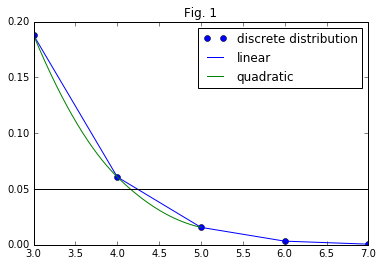

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy import stats
import scipy as sp
from scipy.stats import binom
import random
from scipy.interpolate import interp1d
from tempfile import TemporaryFile
from scipy.stats import pearsonr, betai

np.random.seed(seed=None) # important, that we are not starting with the same random numbers

def get_m_n_from_bernoulli(N):
        p,P_B =  0.05,0.05
        m_n_bernoulli=np.arange(1,N)*np.nan
        for n in np.arange(1,N):
            x = np.arange(binom.ppf(0.00, n, p),binom.ppf(1.00, n, p)) #range
            prob = binom.sf(x, n, p)
            m = find_m(prob,P_B)
            m_n_bernoulli[n-1]=m*1./n
        return(m_n_bernoulli)

def find_m(array,p):
    if (array.min() >= p) or (array.max() <= p):
        m=np.nan
    else:
        max = np.sum([(array-p) > 0])-1 #closest positive point to p
        f=interp1d(np.arange(max-1,max+2),array[np.arange(max-1,max+2)],kind='quadratic')
        x = np.linspace(max-1, max+1, num=4*100+1, endpoint=True)
        ynew = f(x)   # use interpolation function returned by `interp1d`
        max = np.sum([(ynew-p) > 0])-1
        m=x[max]
    return m

p,P_B =  0.05,0.05
n=30
x = np.arange(binom.ppf(0.00, n, p),binom.ppf(1.00, n, p)) #range
prob = binom.sf(x, n, p)
array=prob
max = np.sum([(array-p) > 0])-1 #closest positive point to p
f=interp1d(np.arange(max-2,max+2),array[np.arange(max-2,max+2)],kind='quadratic')
x = np.linspace(max-2, max+1, num=4*100+1, endpoint=True)
ynew = f(x)   # use interpolation function returned by `interp1d`
tmp = np.sum([(ynew-p) > 0])-1
m=x[tmp]
print 'm',m
print 'm/n',m/n

plt.plot(prob[0:n/2],'ob',label='discrete distribution')
plt.plot(prob[0:n/2],'-b',label='linear')
plt.plot(x,ynew,'-g',label='quadratic')
plt.plot([0,n/2-1],[P_B,P_B],'k')
plt.legend()
plt.xlim(3,7)
plt.ylim(0,0.2)
plt.title('Fig. 1')

Fig. 1: The binomial survival function for B(n=30,p=0.05) is a discrete function (blue dots). However if we want to find the m that gives exactly $P_B=0.05$ (black horizontal line) we need to interpolate. Linear interpolation (blue line) as done by Wang and Shen [1999] leads to overestimation of m, therefore we employ quadratic interpolation here.

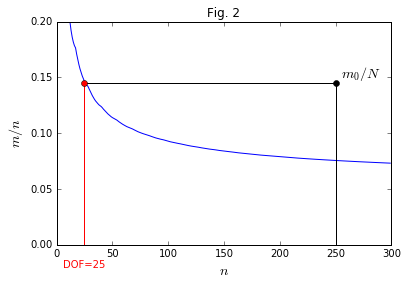

In [5]:
m_n_bernoulli=get_m_n_from_bernoulli(300)

plt.plot(np.arange(1,300),m_n_bernoulli,'b-')
plt.xlabel(r'$n$',fontsize=14)
plt.ylabel(r'$m/n$',fontsize=14)

# display example of sample statistic
plt.plot(250,m_n_bernoulli[25],'ok')
plt.plot([250,250],[0, m_n_bernoulli[25]],'-k')
plt.plot([25,250],[m_n_bernoulli[25], m_n_bernoulli[25]],'-k')
plt.text(255,m_n_bernoulli[25]+0.005,r'$m_0/N$',color='black',fontsize=14)

plt.plot([25,25],[0, m_n_bernoulli[25]],'-r')
plt.plot(25,m_n_bernoulli[25],'or')
plt.text(6,-0.02,'DOF=25',color='red')
plt.ylim(0,0.2)
plt.title('Fig. 2')

Fig. 2: Estimated percent of binomial tests ($p=0.05$) passed simultaneously a 5\% ($P_B=0.05$); $\int_m^\infty \, B(n,p)(x) \,dx = P_B$. B(n,p) is a binomial distribution of n tests with probability p. For $n \in \{0...300\}$ we get the blue line. The black point is an estimate of $m_0/N$ from a given climate dataset with N=250 spatial points. We compare the estimate of $m_0/N$ to the ratio of $m/n$ of the set of binomial distributions and find that corresponding binomial distribution would be B($n=30,p=0.05$) (red dot). n=30 is the number of independent spatial locations (DOF).

### DOF Estimation

The robustness of the DOF estimation does heavily depend on the number of Monte Carlo simulations (S). The following example is taken from Wang and Shen [1999]. With a given dataset that has 100 spatial DOF generated from a randomly generated standard normal distribution we change S and repeat the DOF estimation 100 times. Fig. 3 shows that with S=100 the mean DOF is overestimated and the spread is large. For S=3000 the mean DOF is 102 with standard variation of 1.8 and is close to the 'true' DOF.

In [33]:
T=40
N=100
var_100dof = np.random.normal(0.5, 0.1, (T, N)) #dim= T,N
var_100dof_large=np.concatenate((var_100dof, var_100dof, var_100dof),axis=1)

In [36]:
%%time
import B_method
Montecarlo_simulations=[100,200,300,400,500,1000,2000,3000]
estimates=100 #100
dofs=np.zeros((len(Montecarlo_simulations),estimates))
for i in np.arange(len(Montecarlo_simulations)):
    dofs[i,:] =B_method.B_method(var_100dof_large,S=Montecarlo_simulations[i],estimates=estimates)
    print Montecarlo_simulations[i],'done'

100 done
200 done
300 done
400 done
500 done
1000 done
2000 done
3000 done
CPU times: user 11min 9s, sys: 1.63 s, total: 11min 11s
Wall time: 11min 11s


mean [ 123.44  115.75  111.66  109.54  107.63  104.89  102.67  102.01]
std [ 36.4706238   25.13140466  20.7818286   19.75470577  16.08518262
  10.39989904   2.20932116   1.79161938]


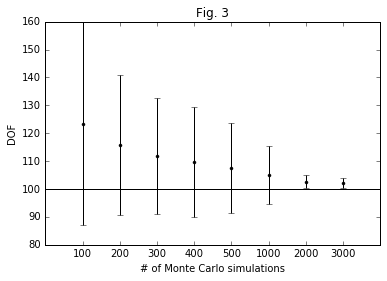

In [38]:
plt.errorbar(np.arange(len(Montecarlo_simulations)), dofs.mean(axis=1), yerr=dofs.std(axis=1), fmt='.k')
plt.plot([-1,len(Montecarlo_simulations)],[100,100],'-k')
plt.xticks(np.arange(len(Montecarlo_simulations)+1),Montecarlo_simulations)
plt.xlim(-1,8)
plt.ylim(80,160)
plt.title('Fig. 3')
plt.xlabel('# of Monte Carlo simulations')
plt.ylabel('DOF')
print 'mean',dofs.mean(axis=1)
print 'std',dofs.std(axis=1)

Fig. 3: DOF means and standard deviations estimates for dataset with 100 spatial DOFs (horizontal black line). The number of Monte Carlo simulations was increased from 100 to 3000.

### References

Wang, X., & Shen, S. S. (1999). Estimation of spatial degrees of freedom of a climate field. Journal of Climate, 12(5 I), 1280–1291. http://doi.org/10.1175/1520-0442(1999)012

Livezey, R. E., & Chen, W. Y. (1983). Statistical Field Significance and its Determination by Monte Carlo Techniques. Monthly Weather Review, 111(1), 46–59. http://doi.org/10.1175/1520-0493(1983)111